#### Import Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Pattern Compositions

In [348]:
# Define patterns for letters A, C, K, T, W (10x10 arrays with 1 for dark pixels)
pattern_A = np.array([
    [1, 1, 1, 1, -1, -1, 1, 1, 1, 1],
    [1, 1, 1, -1, 1, 1, -1, 1, 1, 1],
    [1, 1, -1, 1, 1, 1, 1, -1, 1, 1],
    [1, -1, 1, 1, 1, 1, 1, 1, -1, 1],
    [-1, 1, 1, 1, 1, 1, 1, 1, 1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, 1, 1, 1, 1, 1, 1, 1, 1, -1],
    [-1, 1, 1, 1, 1, 1, 1, 1, 1, -1],
    [-1, 1, 1, 1, 1, 1, 1, 1, 1, -1],
    [-1, 1, 1, 1, 1, 1, 1, 1, 1, -1]
])

pattern_C = np.array([
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, -1, -1, -1, -1, -1, -1, -1, -1, 1],
    [1, -1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, -1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, -1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, -1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, -1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, -1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1,-1, -1, -1, -1, -1, -1, -1, -1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
])

pattern_K = np.array([
    [-1, 1, 1, 1, 1, 1, 1, 1, 1, -1],
    [-1, 1, 1, 1, 1, 1, 1, 1, -1, 1],
    [-1, 1, 1, 1, 1, 1, 1, -1, 1, 1],
    [-1, 1, 1, 1, 1, 1, -1, 1, 1, 1],
    [-1, 1, 1, 1, -1, -1, 1, 1, 1, 1],
    [-1, 1, 1, -1, 1, 1, 1, 1, 1, 1],
    [-1, 1, -1, 1, 1, 1, 1, 1, 1, 1],
    [-1, -1, 1, 1, 1, 1, 1, 1, 1, 1],
    [-1, 1, -1, 1, 1, 1, 1, 1, 1, 1],
    [-1, 1, 1, -1, -1, -1, -1, -1, -1, -1]
])

pattern_T = np.array([
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [1, 1, 1, -1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, -1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, -1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, -1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, -1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, -1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, -1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, -1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, -1, 1, 1, 1, 1, 1, 1]
])

pattern_W = np.array([
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, -1, 1, 1, 1, 1, 1, 1, -1],
    [1, 1, -1, 1, 1, 1, 1, 1, 1, -1],
    [1, 1, -1, 1, 1, 1, 1, 1, 1, -1],
    [1, 1, -1, 1, 1, -1, -1, 1, 1, -1],
    [1, 1, -1, 1, 1, -1, -1, 1, 1, -1],
    [1, 1, -1, 1, 1, -1, -1, 1, 1, -1],
    [1, 1, -1, 1, 1, -1, -1, 1, 1, -1],
    [1, 1, -1, -1, -1, -1, -1, -1, -1, -1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
])


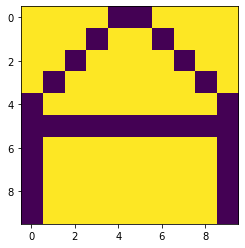

In [349]:
# A
plt.imshow(pattern_A)

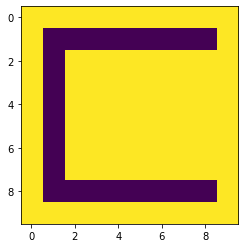

In [350]:
# C
plt.imshow(pattern_C)

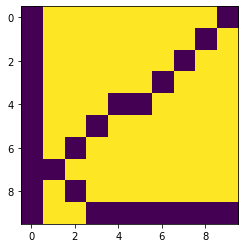

In [351]:
# K
plt.imshow(pattern_K)

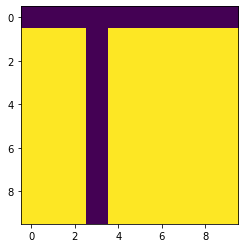

In [352]:
# T
plt.imshow(pattern_T)

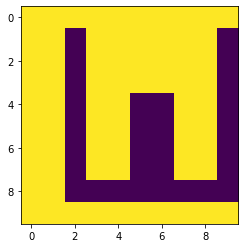

In [353]:
# W
plt.imshow(pattern_W)

#### Model Functions

In [371]:
# Hopfield weight matrix calculation function
def hopfield(mu_s):
    (M,J) = mu_s.shape # Define M and J

    if M>=0.15*J: # Check if pattern number is valid
        print("Pattern-neuron number condition error!")
        return
    
    W=np.matmul(mu_s.T,mu_s) # Calculate weight matrix by storing each pattern's information
    np.fill_diagonal(W,0) # Fill the diagonals with zeros since there is no self-feedback
    return W

# Gaussian noise addition to patterns to use them as inputs to model
def compose_x(pattern,mean,std):
    J= pattern.shape[1]
    noise= np.random.normal(mean,std,J) # Get a J dimensional noise vector with corresponding mean and standard deviation
    x=pattern.reshape((J)) + noise # Add noise to the corresponding pattern
    x[x>=0]=1 # Apply hard-nonlinearity
    x[x<0]=-1
    return x

# A predict function to make the outputs more interpretable when visualizing 
def predict(W,inputs):
    predictions=[]
    J=inputs.shape[0]
    for input in inputs.reshape((1,J)):
        input = np.array(input).reshape((J,1))
        prediction= iteration(W,input) # Iteration function takes weight matrix and input vector as inputs
        predictions.append(prediction) # Returns the output and appends them to a list
    predictions=np.array(predictions)
    return predictions

# Dynamic Equation Application Function
def iteration(W,x):
    J = W.shape[0]
    x_prev=x.copy()
    progress=[x_prev.reshape((1,J))]
    converged=False
    while not converged: # Continue till convergence
        activation = np.dot(W,x_prev) # Calculate next state by weights and previous input state
        activation[activation>=0]=1 # Apply hard-nonlinearity
        activation[activation<0]=-1

        if np.array_equal(activation,x_prev): # If there is no change in the output, say that it has converged
                converged = True
        x_prev = activation
        progress.append(x_prev.reshape((1,J)))
    progress=np.array(progress).reshape((-1,J))
    return progress # Return each epoch to visualize them, too


# Visualization Function
def pattern_convergence(mu_s,pattern):
    J=pattern.shape[1]
    mu = 0
    sigma = [0.5,0.8,1.1]
    W= hopfield(mu_s) # Calculate weight matrix


    for i in range(3):
        input= compose_x(pattern,mu,sigma[i]) # Compose input
        outputs=predict(W,input) # Run the model on input
        num_epoch= outputs.shape[1]-1 # Assign number of epochs according to the outputs
        fig, axs = plt.subplots(1, num_epoch) # Plot them one-by-one
        for j in range(num_epoch):
            axs[j].imshow(outputs[0,j].reshape((10,10)))
            epoch_index=j+1
            axs[j].set_title(f"Std={sigma[i]}, Epoch={epoch_index}")
            axs[j].axis('off')

#### Pattern Matrix Assignment

In [372]:
J=100
M=5
mu_A=np.array(pattern_A).reshape((1,J))
mu_C=np.array(pattern_C).reshape((1,J))
mu_K=np.array(pattern_K).reshape((1,J))
mu_T=np.array(pattern_T).reshape((1,J))
mu_W=np.array(pattern_W).reshape((1,J))
mu_s= np.concatenate([mu_A,mu_W,mu_C,mu_T,mu_K])

#### Convergence of A

If you get an error like " 'Axes' object is not subscriptable ", please just run the cell again and it will work. It happens because sometimes added noise does not change the pattern, hence it doesnt iterate.

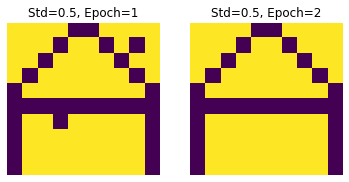

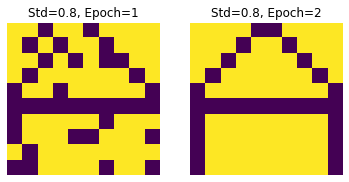

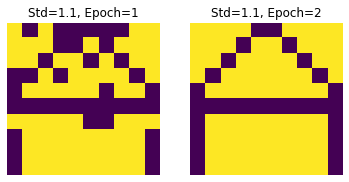

In [376]:
pattern_convergence(mu_s,mu_A)

#### Convergence of W

If you get an error like " 'Axes' object is not subscriptable ", please just run the cell again and it will work. It happens because sometimes added noise does not change the pattern, hence it doesnt iterate.

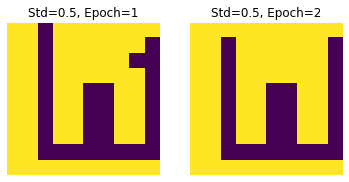

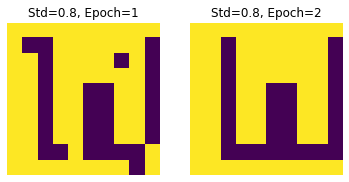

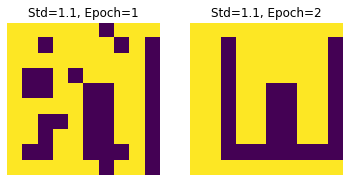

In [365]:
pattern_convergence(mu_s,mu_W)

#### Convergence of C

If you get an error like " 'Axes' object is not subscriptable ", please just run the cell again and it will work. It happens because sometimes added noise does not change the pattern, hence it doesnt iterate.

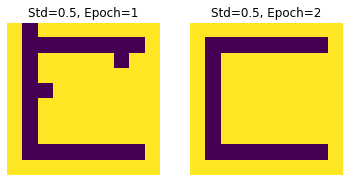

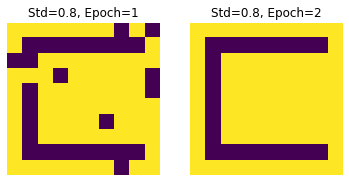

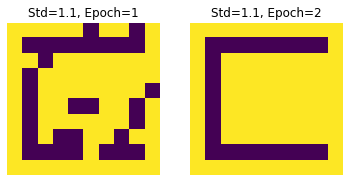

In [364]:
pattern_convergence(mu_s,mu_C)

#### Convergence of T

If you get an error like " 'Axes' object is not subscriptable ", please just run the cell again and it will work. It happens because sometimes added noise does not change the pattern, hence it doesnt iterate.

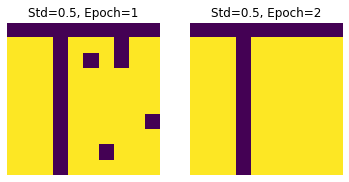

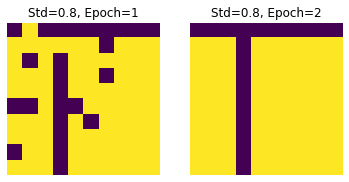

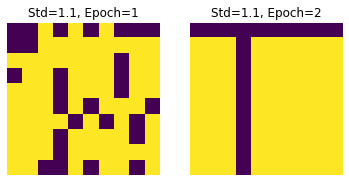

In [363]:
pattern_convergence(mu_s,mu_T)

#### Convergence of K

If you get an error like " 'Axes' object is not subscriptable ", please just run the cell again and it will work. It happens because sometimes added noise does not change the pattern, hence it doesnt iterate.

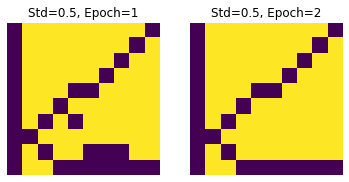

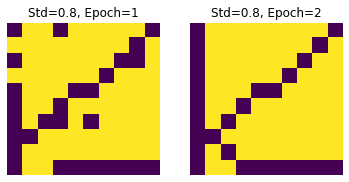

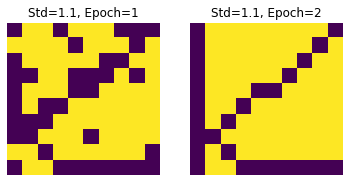

In [361]:
pattern_convergence(mu_s,mu_K)